<a href="https://colab.research.google.com/github/soumyanamboo/Machine-Learning-Techniques/blob/main/KNN_SWI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(centers=((0,0), (5,5)),n_features=2, n_samples=100,cluster_std=3, random_state=42 )


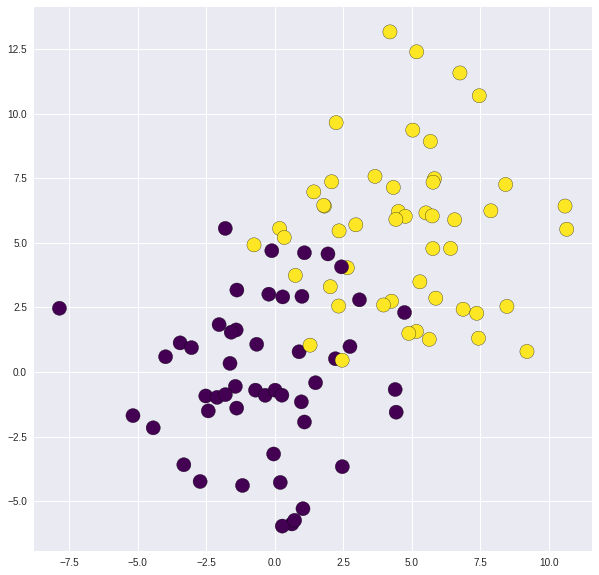

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=200, alpha=1, edgecolors='k', cmap='viridis');

In [ ]:
def distance(x1, x2, q=2):
  if(q==2):  #q=2 -> Euclidian distance
    d = np.sqrt(np.sum((x1-x2)**2, axis=0))
  else:  #q=1 -> Manhatten distance
    d = np.sum(np.abs((x1-x2,)),axis=0)
  return d

In [ ]:
x1 = np.array([[1, 2, 3]])
x2 = np.array([[2, 3, 4]])
print(distance(x1, x2, 2))

[1. 1. 1.]


Find distance based on q (2 for euclidian, 1 for manhatten)

In [ ]:
def distance1(x1, x2, q=2):
  dist = np.sum(np.abs((x1-x2)**q), axis=0)**(1/q)
  return dist

In [ ]:
x = np.array([[2, 3],[4, 5]])
y = np.array([[4, 5],[7, 8]])
print(distance1(x,y))
print(distance(x,y))

[3.60555128 3.60555128]
[3.60555128 3.60555128]


Closest point near to [0, 5]

In [ ]:
p = np.array([0,5]).reshape(2, -1)
print(p)
print(distance1(x.T, p))
d = distance1(x, p)
a = np.argmin(d)
print(x[a])

[[0]
 [5]]
[2.82842712 4.        ]
[2 3]


predict the label of the new point [0,5] for k = np.arange(1, 32, 2).   
Write function predict(X, y, k, newpoint)

In [ ]:
def predict(X, y, k, newpoint):
  newpoint = newpoint.reshape(2,-1)
  distances = distance1(newpoint, X.T)
  sorted_indices = np.argsort(distances)
  labels = y[sorted_indices[:3]]
  knn = np.sum(labels)
  if(knn > k//2):
    return 1
  else:
    return 0

In [ ]:
newpoint = np.array([0, 5])
predict(X, y,5,newpoint)

0

draw decision boundary for k=1, k=3, k=5.   
Write function draw_decision_boundary(X, y, k)

[[-9.85923531 -9.63178286 -9.4043304  ... 12.20365279 12.43110525
  12.6585577 ]
 [-9.85923531 -9.63178286 -9.4043304  ... 12.20365279 12.43110525
  12.6585577 ]
 [-9.85923531 -9.63178286 -9.4043304  ... 12.20365279 12.43110525
  12.6585577 ]
 ...
 [-9.85923531 -9.63178286 -9.4043304  ... 12.20365279 12.43110525
  12.6585577 ]
 [-9.85923531 -9.63178286 -9.4043304  ... 12.20365279 12.43110525
  12.6585577 ]
 [-9.85923531 -9.63178286 -9.4043304  ... 12.20365279 12.43110525
  12.6585577 ]]
[-9.85923531 -9.63178286 -9.4043304  ... 12.20365279 12.43110525
 12.6585577 ]


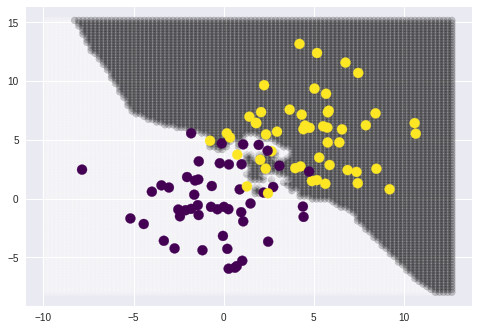

In [ ]:
x1min, x2min = np.min(X, axis=0) - 2
x1max, x2max = np.max(X, axis=0) + 2

xx = np.linspace(x1min, x1max, 100)
yy = np.linspace(x2min, x2max, 100)

txx, tyy = np.meshgrid(xx, yy)
print(txx)
txx = txx.flatten()
print(txx)
tyy = tyy.flatten()
grid_points = np.column_stack((txx, tyy))

grid_predictions = np.zeros_like(txx)
for i in range(grid_points.shape[0]):
  grid_predictions[i] = predict(X, y, 3, grid_points[i])

plt.scatter(txx, tyy, c = grid_predictions, alpha=0.2)

plt.scatter(X[:,0], X[:,1], c=y, alpha=1, s=100, cmap='viridis');